In [3]:
import numpy as np
import librosa
import os

# Define the list of labels to classify
labels = ['cat', 'dog']

# Define the feature extraction function
def extract_features(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)
    
    # Extract Mel spectrogram features
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    
    # Flatten the feature matrix into a 1D array
    features = log_S.flatten()
    
    return features

# Define the directory paths for the training and testing data



train_dir = '/kaggle/input/audio-cats-and-dogs/cats_dogs/train/'
test_dir = '/kaggle/input/audio-cats-and-dogs/cats_dogs/train/'

# Initialize the feature and label arrays for training and testing data
X_train, y_train = [], []
X_test, y_test = [], []

# Load the training data
for label in labels:
    for filename in os.listdir(os.path.join(train_dir, label)):
        if filename.endswith('.wav'):
            file_path = os.path.join(train_dir, label, filename)
            features = extract_features(file_path)
            X_train.append(features)
            y_train.append(label)

# Load the testing data
for label in labels:
    for filename in os.listdir(os.path.join(test_dir, label)):
        if filename.endswith('.wav'):
            file_path = os.path.join(test_dir, label, filename)
            features = extract_features(file_path)
            X_test.append(features)
            y_test.append(label)

# Convert the feature and label arrays to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Convert the categorical labels to numerical labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Train a classifier on the training data and evaluate on the testing data
from sklearn.svm import SVC

# Initialize the classifier
clf = SVC(kernel='linear', C=1, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Test the classifier on the testing data
accuracy = clf.score(X_test, y_test)

print(f'Accuracy: {accuracy:.2f}')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TypeError: melspectrogram() takes 0 positional arguments but 1 positional argument (and 1 keyword-only argument) were given

In [7]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display

# audio plot 
from scipy.io import wavfile as wav
import IPython.display as ipd

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import Callback,EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, Activation, Flatten, Dense,GlobalAveragePooling2D, Dropout

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
path = '../input/audio-cats-and-dogs/'
path_train = path+'train'
path_test = path+'test'
path__='../input/audio-cats-and-dogs/cats_dogs'
p_train = '../input/audio-cats-and-dogs/cats_dogs/train'
p_test = '../input/audio-cats-and-dogs/cats_dogs/test'

In [9]:
data_train = list(glob.glob(p_train+'/**/*.wav'))
data_test = list(glob.glob(p_test+'/**/*.wav'))

In [ ]:
#import glob as gb
#m=os.listdir(p_train)
#labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], data_train))
#file_path = pd.Series(data_train, name='File_Path').astype(str)
#labels = pd.Series(labels, name='Labels')
#data = pd.concat([file_path, labels], axis=1)
#data = data.sample(frac=1).reset_index(drop=True)
#data.head()


In [10]:
import glob as gb
data_path = []
data_label = []
path = "/kaggle/input/audio-cats-and-dogs/cats_dogs/"
for key in os.listdir(path+'train'):
    files=gb.glob(pathname=str(path+'train//'+key+'/*.wav'))
    for j in files:
        data_path.append(j )
        data_label.append(key)
print(len(data_label))
print(len(data_path))

210
210


In [ ]:
#labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], data_train))

In [ ]:
#file_path = pd.Series(data_train, name='File_Path').astype(str)
#labels = pd.Series(labels, name='Labels')
#data = pd.concat([file_path, labels], axis=1)
#data = data.sample(frac=1).reset_index(drop=True)
#data.head()

In [14]:
data_path = pd.Series(data_path, name='File_Path').astype(str)
data_label = pd.Series(data_label, name='Labels')
data = pd.concat([data_path, data_label], axis=1)

data

,File_Path,Labels
0,/kaggle/input/audio-cats-and-dogs/cats_dogs/tr...,dog
1,/kaggle/input/audio-cats-and-dogs/cats_dogs/tr...,dog
2,/kaggle/input/audio-cats-and-dogs/cats_dogs/tr...,dog
3,/kaggle/input/audio-cats-and-dogs/cats_dogs/tr...,dog
4,/kaggle/input/audio-cats-and-dogs/cats_dogs/tr...,dog
...,...,...
205,/kaggle/input/audio-cats-and-dogs/cats_dogs/tr...,cat
206,/kaggle/input/audio-cats-and-dogs/cats_dogs/tr...,cat
207,/kaggle/input/audio-cats-and-dogs/cats_dogs/tr...,cat
208,/kaggle/input/audio-cats-and-dogs/cats_dogs/tr...,cat


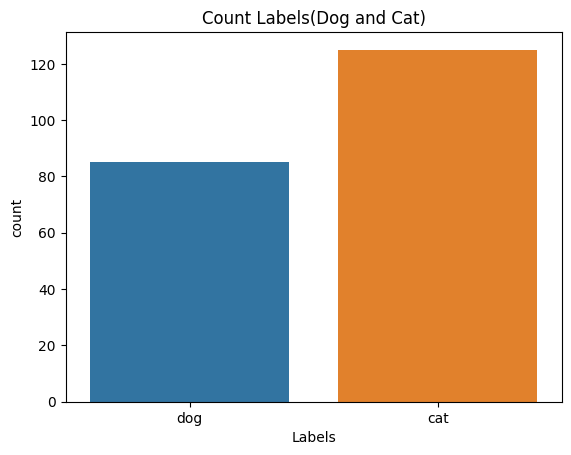

cat    125
dog     85
Name: Labels, dtype: int64

In [15]:
sns.countplot(x='Labels', data=data)
plt.title('Count Labels(Dog and Cat)')
plt.show()
data['Labels'].value_counts()

In [18]:
data.head()

,File_Path,Labels
0,/kaggle/input/audio-cats-and-dogs/cats_dogs/tr...,dog
1,/kaggle/input/audio-cats-and-dogs/cats_dogs/tr...,dog
2,/kaggle/input/audio-cats-and-dogs/cats_dogs/tr...,dog
3,/kaggle/input/audio-cats-and-dogs/cats_dogs/tr...,dog
4,/kaggle/input/audio-cats-and-dogs/cats_dogs/tr...,dog


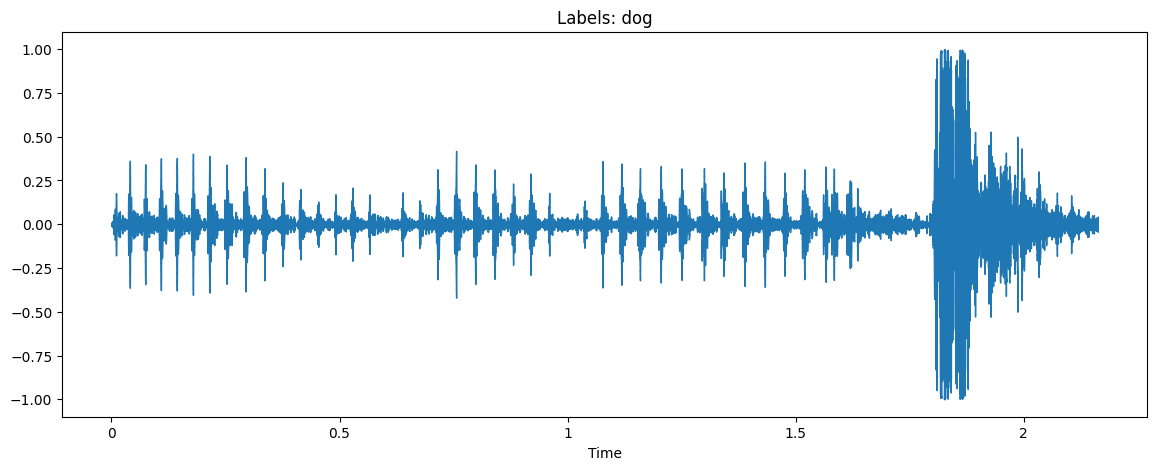

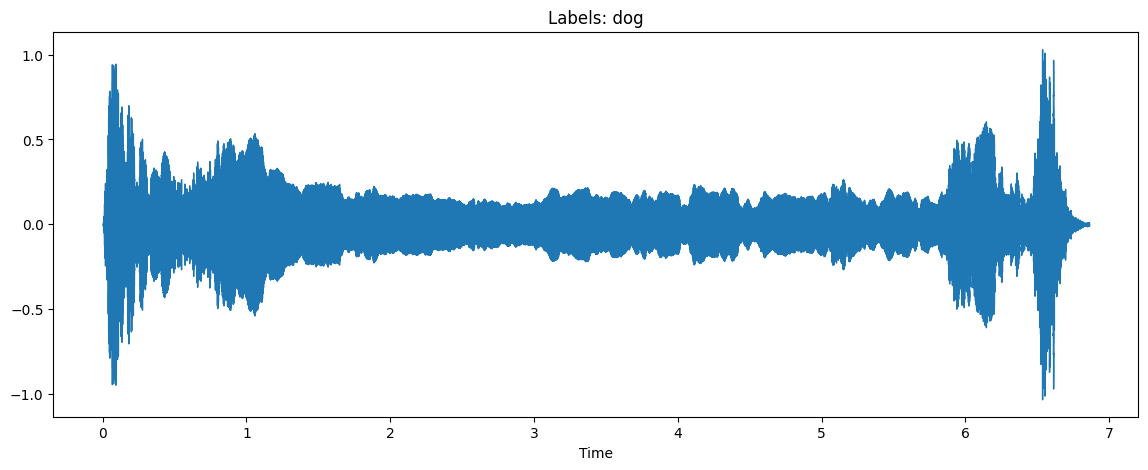

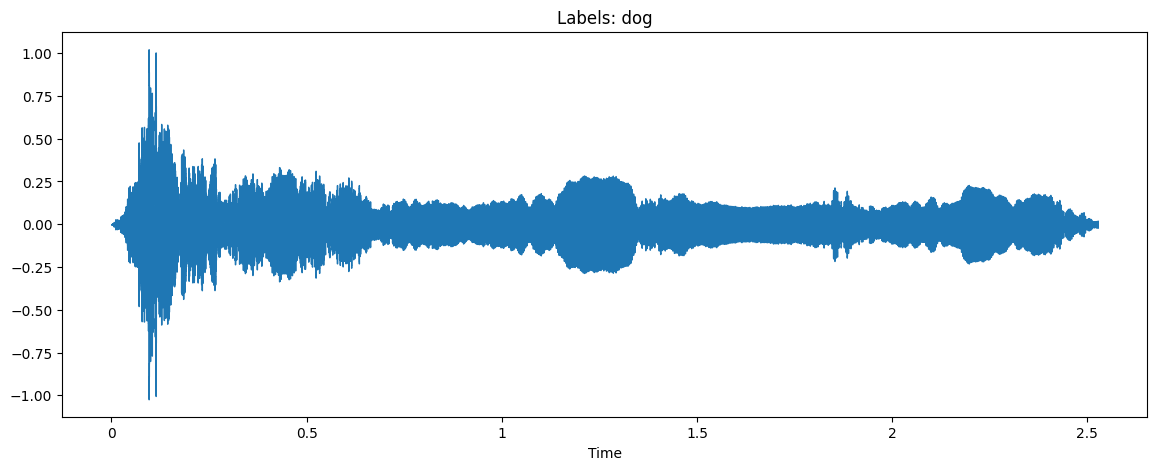

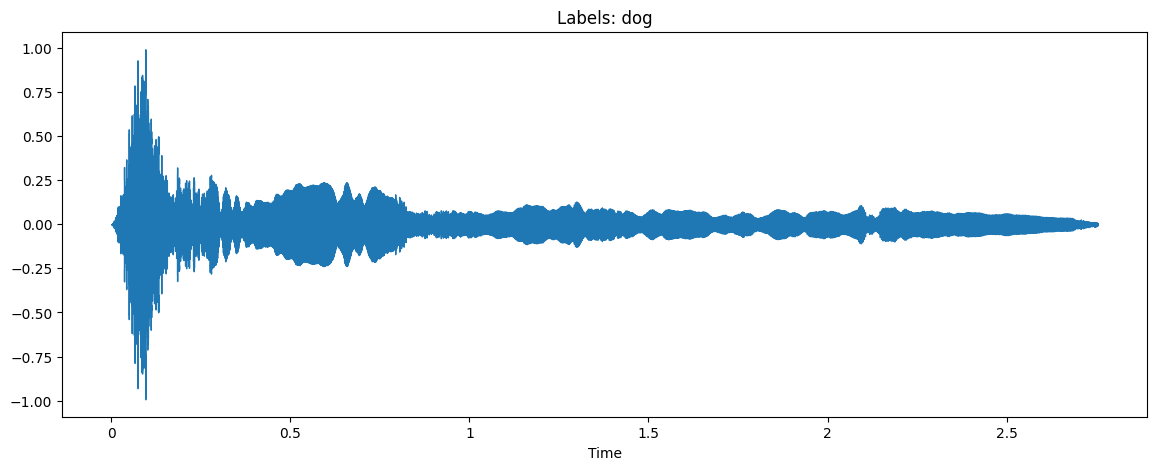

In [19]:
for i in range(4):
    x, sr = librosa.load(data.File_Path[i])
    plt.figure(figsize=(14,5))
    plt.title('Labels: '+str(data['Labels'][i]))
    librosa.display.waveshow(x, sr=sr)

In [20]:
data.File_Path[2]

'/kaggle/input/audio-cats-and-dogs/cats_dogs/train//dog/dog_barking_50.wav'

In [21]:
ipd.Audio(data.File_Path[1])
ipd.Audio(data.File_Path[0])

In [22]:
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name,sr=160000) 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    return mfccs_processed

In [23]:
import numpy as np
features = []
for index, row in data.iterrows():
    file_name = str(row['File_Path'])
    class_label = row["Labels"]
    data_ = extract_features(file_name)
    features.append([data_, class_label])

In [117]:
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])
featuresdf.head()

,feature,class_label
0,"[-351.33447, 145.24509, 46.970455, 12.4151745,...",dog
1,"[-356.7258, 199.48227, 92.153564, 8.259846, -2...",dog
2,"[-376.47168, 198.41301, 77.0762, -5.351152, -2...",dog
3,"[-425.04602, 182.86368, 66.90674, -11.580606, ...",dog
4,"[-362.29257, 182.25665, 80.08082, 1.2362342, -...",dog


In [25]:
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

In [26]:
X.shape, y.shape

((210, 40), (210,))

In [27]:
le = LabelEncoder()
y = to_categorical(le.fit_transform(y))

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [30]:
model = Sequential()
model.add(Dense(64, input_dim=40,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(46, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                2624      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 46)                2990      
                                                                 
 dropout_4 (Dropout)         (None, 46)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                1504      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                

In [31]:
earlystop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')

In [32]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[earlystop], epochs=100)

Epoch 1/100
6/6 [==============================] - 7s 49ms/step - loss: 18.7052 - accuracy: 0.5536 - val_loss: 6.0450 - val_accuracy: 0.6667
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 12.6009 - accuracy: 0.5595 - val_loss: 1.3818 - val_accuracy: 0.7619
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 10.3326 - accuracy: 0.5655 - val_loss: 1.3473 - val_accuracy: 0.8333
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 8.1749 - accuracy: 0.6190 - val_loss: 2.4521 - val_accuracy: 0.6429
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 8.2398 - accuracy: 0.6012 - val_loss: 2.3978 - val_accuracy: 0.6429
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 7.1377 - accuracy: 0.6667 - val_loss: 1.7850 - val_accuracy: 0.8333
Epoch 6: early stopping


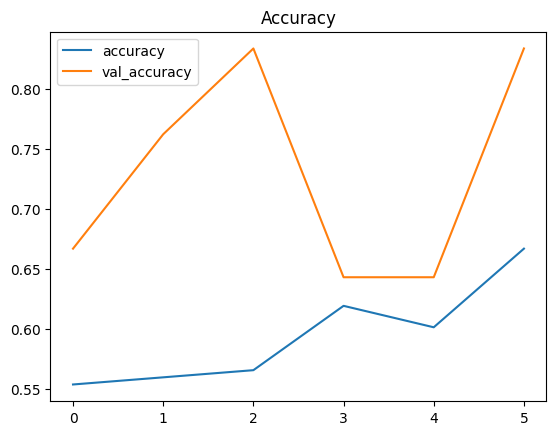

In [33]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

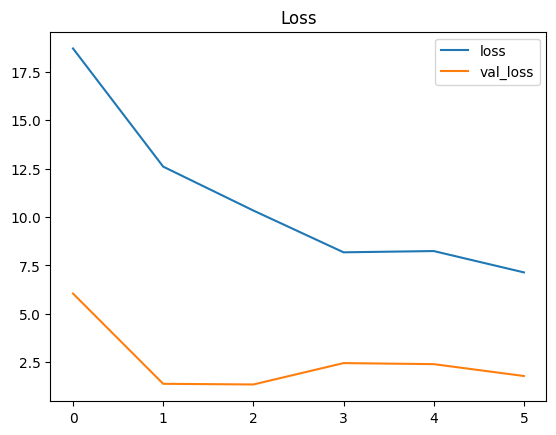

In [34]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [35]:
# Evaluating The Model
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy:\033[01m {0:.2%}\033[0m".format(score[1]))
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy:\033[01m {0:.2%}\033[0m".format(score[1]))

Training Accuracy: 74.40%
Testing Accuracy: 83.33%


In [36]:
def prediction_(path_sound):
    data_sound = extract_features(path_sound)
    X = np.array(data_sound)
    X = X.reshape(1,40)
    pred_ = model.predict(X)
    pred_ = np.argmax(pred_,axis=1)
    pred_class = le.inverse_transform(pred_)
    print("The predicted class is:\033[01m ", pred_class[0],'\033[0m \n')

In [37]:
path_sound = '../input/audio-cats-and-dogs/cats_dogs/test/cats/cat_126.wav'
prediction_(path_sound)
ipd.Audio(path_sound)

1/1 [==============================] - 0s 125ms/step
The predicted class is:  cat  



In [38]:
path_sound = '/kaggle/input/audio-cats-and-dogs/cats_dogs/test/cats/cat_110.wav'
prediction_(path_sound)
ipd.Audio(path_sound)

1/1 [==============================] - 0s 44ms/step
The predicted class is:  cat  



In [39]:
path_sound = '../input/audio-cats-and-dogs/cats_dogs/test/test/dog_barking_89.wav'
prediction_(path_sound)
ipd.Audio(path_sound)

1/1 [==============================] - 0s 49ms/step
The predicted class is:  cat  



In [40]:
def test_the_model(path):
    path_sound = path
    prediction_(path_sound)
    ipd.Audio(path_sound)

In [41]:
path_sound='/kaggle/input/audio-cats-and-dogs/cats_dogs/test/cats/cat_144.wav'
test_the_model(path_sound)
ipd.Audio(path_sound)

1/1 [==============================] - 0s 43ms/step
The predicted class is:  cat  



In [69]:
from tensorflow import keras
model11=keras.models.Sequential([
    keras.layers.Dense(64, input_dim=40,activation='relu'),
    keras.layers.Dense(32,activation='relu'),   
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dropout(.5),
    keras.layers.Dense(2,activation='softmax'),
    
])

In [70]:
model11.compile(optimizer = 'adam', loss = 'binary_crossentropy',  metrics=['accuracy'])

In [71]:
history1 = model11.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[earlystop], epochs=100)

Epoch 1/100
6/6 [==============================] - 2s 42ms/step - loss: 15.4121 - accuracy: 0.5774 - val_loss: 6.1620 - val_accuracy: 0.6429
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 8.9040 - accuracy: 0.5417 - val_loss: 1.6215 - val_accuracy: 0.5714
Epoch 3/100
6/6 [==============================] - 0s 13ms/step - loss: 5.4987 - accuracy: 0.5476 - val_loss: 1.0176 - val_accuracy: 0.8095
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 2.2053 - accuracy: 0.6429 - val_loss: 1.1686 - val_accuracy: 0.7857
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 1.3082 - accuracy: 0.6369 - val_loss: 0.7879 - val_accuracy: 0.6905
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.9657 - accuracy: 0.4702 - val_loss: 0.5736 - val_accuracy: 0.6667
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: 0.7508 - accuracy: 0.4405 - val_loss: 0.5653 - val_accuracy: 0.4524
Epoch 8/100
6/6 [==

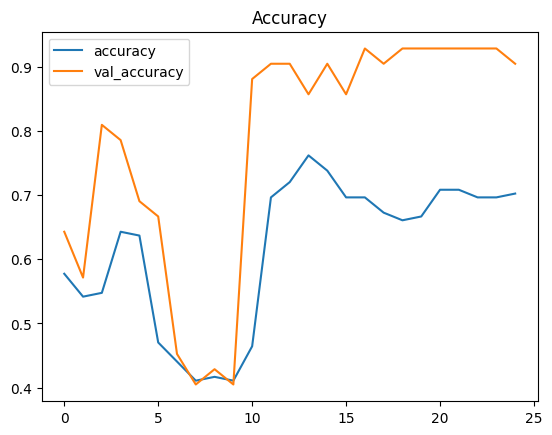

In [72]:
pd.DataFrame(history1.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

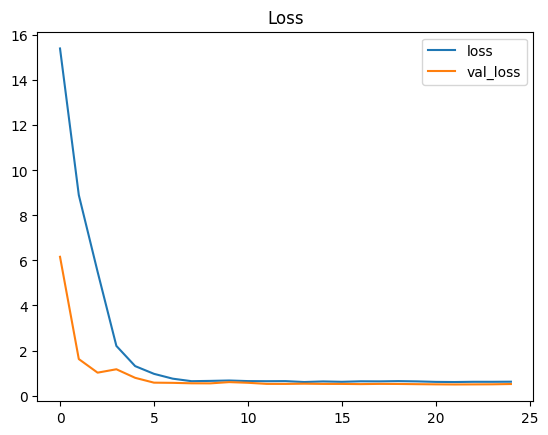

In [73]:
pd.DataFrame(history1.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [74]:
# Evaluating The Model
score = model11.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy:\033[01m {0:.2%}\033[0m".format(score[1]))
score = model11.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy:\033[01m {0:.2%}\033[0m".format(score[1]))

Training Accuracy: 82.14%
Testing Accuracy: 90.48%


In [76]:
import sklearn
x_train = sklearn.preprocessing.scale(x_train, axis=1)
x_test = sklearn.preprocessing.scale(x_test, axis=1)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[earlystop], epochs=100)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probab

6/6 [==============================] - 2s 17ms/step - loss: 0.6623 - accuracy: 0.6905 - val_loss: 0.6248 - val_accuracy: 0.6429
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6451 - accuracy: 0.6250 - val_loss: 0.6077 - val_accuracy: 0.6429
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6440 - accuracy: 0.6667 - val_loss: 0.5914 - val_accuracy: 0.6429
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6243 - accuracy: 0.7024 - val_loss: 0.5709 - val_accuracy: 0.7857
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 0.6049 - accuracy: 0.7321 - val_loss: 0.5441 - val_accuracy: 0.9048
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 0.5913 - accuracy: 0.7083 - val_loss: 0.5148 - val_accuracy: 0.8810
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 0.5620 - accuracy: 0.7917 - val_loss: 0.4909 - val_accuracy: 0.9524
Epoch 8/100
6/6 [=================

In [77]:
# Evaluating The Model
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy:\033[01m {0:.2%}\033[0m".format(score[1]))
score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy:\033[01m {0:.2%}\033[0m".format(score[1]))

Training Accuracy: 87.50%
Testing Accuracy: 92.86%


In [119]:
featuresdf

,feature,class_label
0,"[-351.33447, 145.24509, 46.970455, 12.4151745,...",dog
1,"[-356.7258, 199.48227, 92.153564, 8.259846, -2...",dog
2,"[-376.47168, 198.41301, 77.0762, -5.351152, -2...",dog
3,"[-425.04602, 182.86368, 66.90674, -11.580606, ...",dog
4,"[-362.29257, 182.25665, 80.08082, 1.2362342, -...",dog
...,...,...
205,"[-417.3832, 161.29976, -11.445742, -38.32645, ...",cat
206,"[-306.58182, 225.89075, 0.30763915, -64.393105...",cat
207,"[-405.55548, 224.42001, 58.11597, -40.935596, ...",cat
208,"[-312.53925, 252.14279, 19.351572, -59.118332,...",cat


In [120]:
from sklearn.model_selection import train_test_split
y=data['Labels']

        

x_train, x_test, y_train, y_test = train_test_split(X, featuresdf['class_label'], random_state=42, test_size=0.1, shuffle=True)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Random Forest Classifier

In [124]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
acc_random=accuracy_score(y_pred, y_test)
print('random forest accuracy %s' % accuracy_score(y_pred, y_test))

random forest accuracy 0.9047619047619048


# Multinomial Naive Bayes Classifier

In [127]:
# Model 1: Multinomial Naive Bayes Classifier
from sklearn.linear_model import SGDClassifier
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
lsvm.fit(x_train, y_train)
y_pred = lsvm.predict(x_test)
acc_random=accuracy_score(y_pred, y_test)
print('random forest accuracy %s' % accuracy_score(y_pred, y_test))

random forest accuracy 0.9523809523809523


# Logistic Regression

In [128]:
# Model 3: logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_random=accuracy_score(y_pred, y_test)
print('random forest accuracy %s' % accuracy_score(y_pred, y_test))

random forest accuracy 0.8571428571428571


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest Classifier

In [133]:
# Model 4: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
acc_random=accuracy_score(y_pred, y_test)
print('random forest accuracy %s' % accuracy_score(y_pred, y_test))

random forest accuracy 0.9523809523809523
